In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D ,Dense , MaxPooling2D
from tensorflow.keras.activations import relu , softmax
from tensorflow.keras.utils import normalize


mnist =  tf.keras.datasets.mnist
(x_train , y_train) , (x_test , y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Min Filter

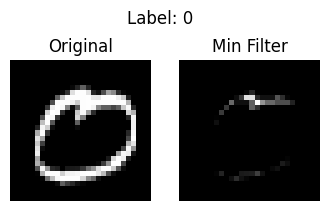

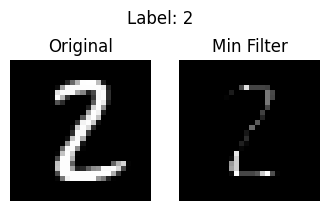

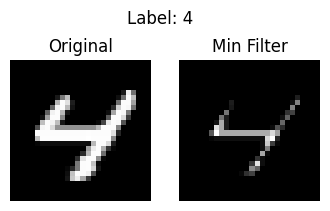

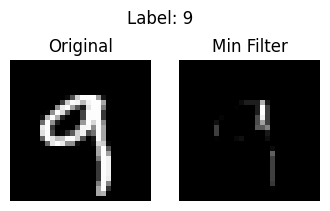

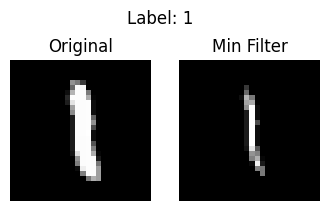

In [2]:

random_samples = np.random.choice(len(x_train), size=5, replace=False)

for i in random_samples:
    img = x_train[i]

    denoised = cv2.medianBlur(img, ksize=3)
    min_filtered = cv2.erode(img, kernel=np.ones((3, 3), np.uint8))

    plt.figure(figsize=(4, 2.5))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.axis('off')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Min Filter")
    plt.axis('off')
    plt.imshow(min_filtered, cmap='gray')

    plt.suptitle(f"Label: {y_train[i]}")
    plt.show()

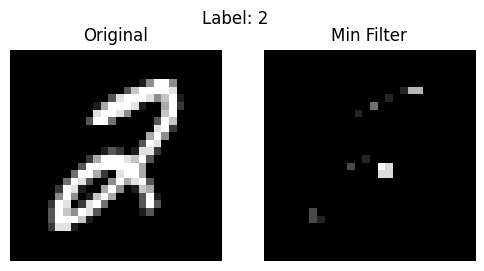

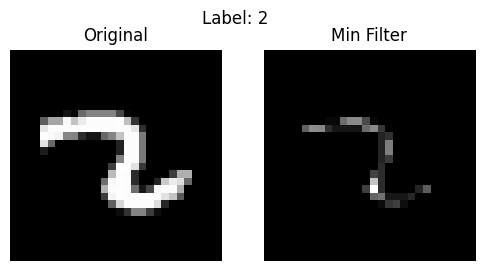

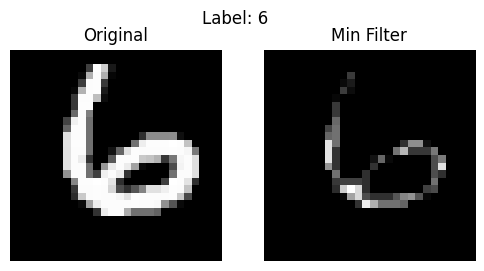

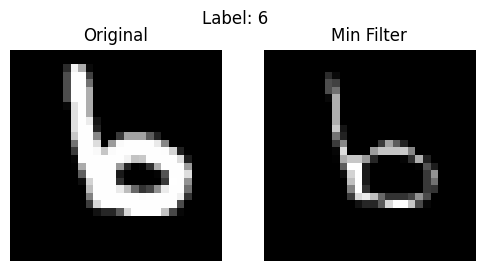

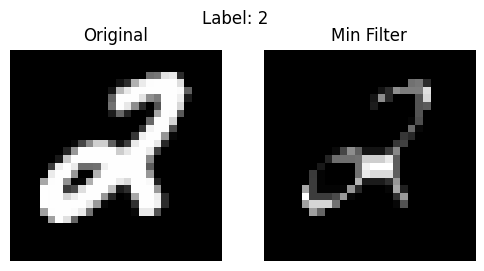

In [4]:
random_samples = np.random.choice(len(x_train), size=5, replace=False)

for i in random_samples:
    img = x_train[i]

    # Ensure the image is 2D (grayscale) and of type uint8
    if img.ndim == 3 and img.shape[-1] == 1:
        img = img.squeeze(-1)
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)

    # Apply Min filter using erosion
    min_filtered = cv2.erode(img, kernel=np.ones((3, 3), np.uint8))

    # Visualization
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.axis('off')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Min Filter")
    plt.axis('off')
    plt.imshow(min_filtered, cmap='gray')

    plt.suptitle(f"Label: {y_train[i]}")
    plt.show()


In [5]:
def min_filter(img):
    return cv2.erode(img, kernel=np.ones((3, 3), np.uint8))

# Apply the filter to training and test sets
x_train_min = np.array([min_filter(img.squeeze()) for img in x_train])
x_test_min = np.array([min_filter(img.squeeze()) for img in x_test])

# Normalize to [0, 1] and expand dims to (n, 28, 28, 1)
x_train_min = (x_train_min.astype('float32') / 255.0)[..., np.newaxis]
x_test_min = (x_test_min.astype('float32') / 255.0)[..., np.newaxis]

### CNN Model

In [7]:
# Build the model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model on Min filtered images
history = model.fit(x_train_min, y_train,validation_split=0.1, epochs=5,batch_size=128)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test_min, y_test, verbose=0)
print(f"\nTest Accuracy on Min-filtered digits: {test_acc:.4f}")
print(f"Test Loss on Min-filtered digits: {test_loss:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.7471 - loss: 0.9032 - val_accuracy: 0.9165 - val_loss: 0.2861
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.9068 - loss: 0.2989 - val_accuracy: 0.9333 - val_loss: 0.2242
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9299 - loss: 0.2240 - val_accuracy: 0.9370 - val_loss: 0.1992
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9376 - loss: 0.1885 - val_accuracy: 0.9435 - val_loss: 0.1829
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.9489 - loss: 0.1562 - val_accuracy: 0.9527 - val_loss: 0.1572

Test Accuracy on Min-filtered digits: 0.9468
Test Loss on Min-filtered digits: 0.1616


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


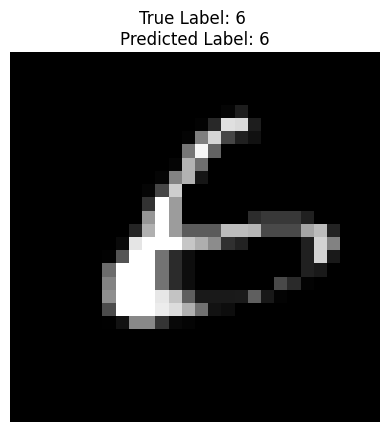

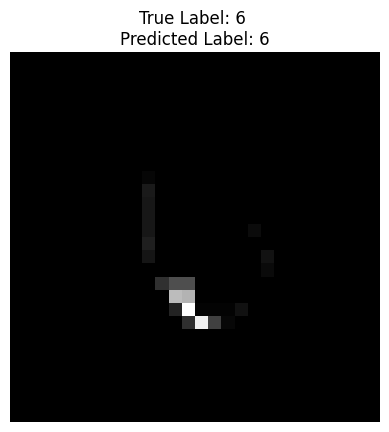

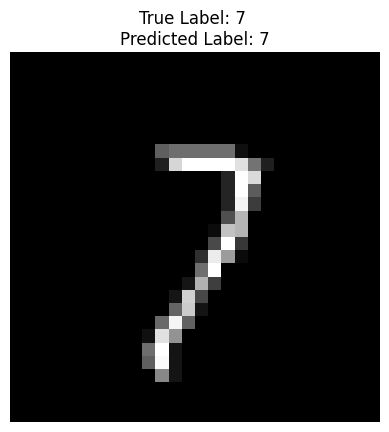

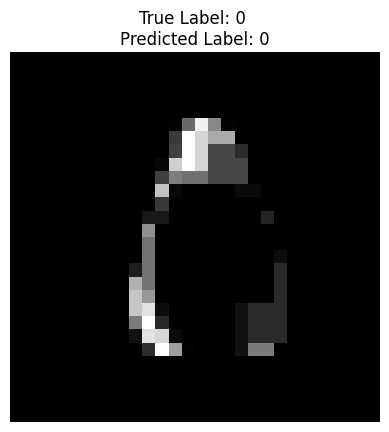

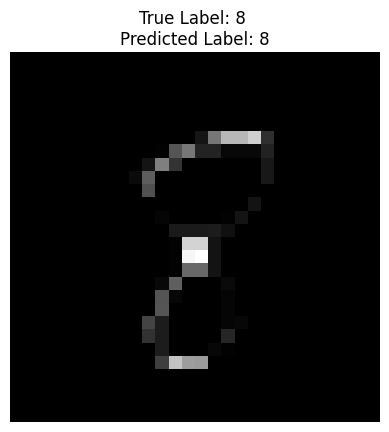

In [8]:
random_test_samples = np.random.choice(len(x_test_min), size=5, replace=False)
predictions = model.predict(x_test_min[random_test_samples])
for idx, pred in zip(random_test_samples, predictions):
    plt.imshow(x_test_min[idx].squeeze(), cmap='gray')
    plt.title(f"True Label: {y_test[idx]} \nPredicted Label: {np.argmax(pred)}")
    plt.axis('off')
    plt.show()


In [ ]:
model.save('Mnist_Min_model.keras')
print("\n Model saved ✅")


 Model saved ✅
